# Organizing data with the Pandas *groupby* function

For this example we will assume and experiment comparing the effect of a drug on wildtype and mutant animal. There are two measurements for each animal prior to and after drug treatment. We will start with the data in [tidy format](https://en.wikipedia.org/wiki/Tidy_data)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('groupby_data.csv')
print(df.head())

   animal genotype  condition  measurement  value
0       1       WT   baseline            1    0.9
1       1       WT   baseline            2    1.1
2       1       WT  treatment            1    1.8
3       1       WT  treatment            2    2.2
4       2       WT   baseline            1    0.8


We'd like to compare treatment to baseline in both the WT and mutant animals. The [Pandas](https://pandas.pydata.org/) *groupby* function will organize the data for us and the resulting data structure has a *get_group* function that will allow us to access the data for each of the four groups

In [3]:
grouped = df.groupby(['genotype', 'condition'])
wt_baseline = grouped.get_group(('WT', 'baseline'))
print(wt_baseline.head())

   animal genotype condition  measurement  value
0       1       WT  baseline            1    0.9
1       1       WT  baseline            2    1.1
4       2       WT  baseline            1    0.8
5       2       WT  baseline            2    1.2


The *groupby* data structure has [methods](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby-object-attributes) for basic data analysis. We could use the *mean* and *std* methods which generate new dataframes, each with a [multiIndex](http://pandas.pydata.org/pandas-docs/stable/advanced.html). In these dataframes, the value column now represents the mean (std) of the corresponding category of animals. However, there is an *agg* function that creates a single dataframe with columns corresponding to an arbitrary list of functions. We'll use it with both the *mean* and *std* functions. With the multiIndex, accessing sections of the data is relatively easy.

                    mean       std
genotype condition                
WT       baseline    1.0  0.182574
         treatment   2.0  0.365148
mutant   baseline    2.0  0.230940
         treatment   2.0  0.461880

The WT baseline mean is 1.0

condition
baseline     1.0
treatment    2.0
Name: mean, dtype: float64

genotype
WT        0.182574
mutant    0.230940
Name: std, dtype: float64



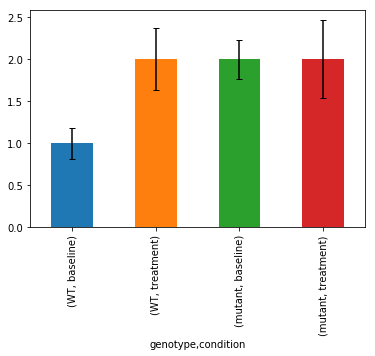

In [4]:
summary = grouped['value'].agg([np.mean, np.std])
print(summary.head())
print()
print('The WT baseline mean is', summary.loc[('WT','baseline')]['mean'])
print()
print(summary.loc[('WT',)]['mean'])  # THe loc method provides easy access to the top level of the multiIndex
print()
print(summary.xs('baseline', level=1)['std'])  # need the xs method to access sublevels of the multiIndex
print()

summary.plot.bar(y='mean', yerr='std', capsize=3, legend=False)

In some cases, it is better to create dataframes with labelled columns rather than a MultiIndex. For example, categorical plots in [Seaborn](https://seaborn.pydata.org/) work better without the MultiIndex.

This can be accomplished by passing the parameter *as_index=False* to the *groupby* function

  genotype  condition  animal  measurement  value
0       WT   baseline     1.5          1.5    1.0
1       WT  treatment     1.5          1.5    2.0
2   mutant   baseline     3.5          1.5    2.0
3   mutant  treatment     3.5          1.5    2.0


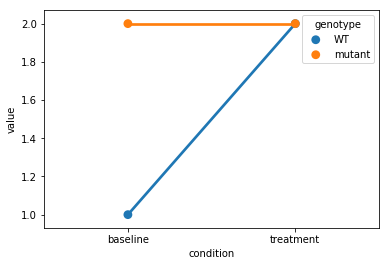

In [5]:
mean2 = df.groupby(['genotype', 'condition'], as_index=False).mean()
print(mean2.head())
sns.pointplot(x='condition', y='value', hue='genotype', data=mean2)

If the dataframe has already been created with a MultiIndex, the *reset_index* method can be used to go back to labelled columns

  genotype  condition  mean       std
0       WT   baseline   1.0  0.182574
1       WT  treatment   2.0  0.365148
2   mutant   baseline   2.0  0.230940
3   mutant  treatment   2.0  0.461880
                    mean       std
genotype condition                
WT       baseline    1.0  0.182574
         treatment   2.0  0.365148
mutant   baseline    2.0  0.230940
         treatment   2.0  0.461880


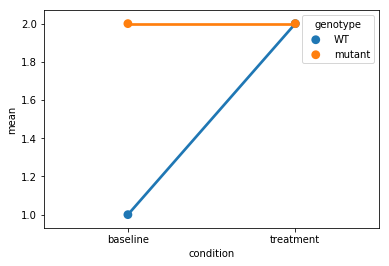

In [6]:
summary2 = summary.reset_index()
print(summary2.head())
print(summary.head())
sns.pointplot(x='condition', y='mean', capsize=3, hue='genotype', data=summary2)

Of course, if all you wanted were the graphs, [Seaborn](https://seaborn.pydata.org/) can do that without any of the above analysis

C:\Users\eisenmanl\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


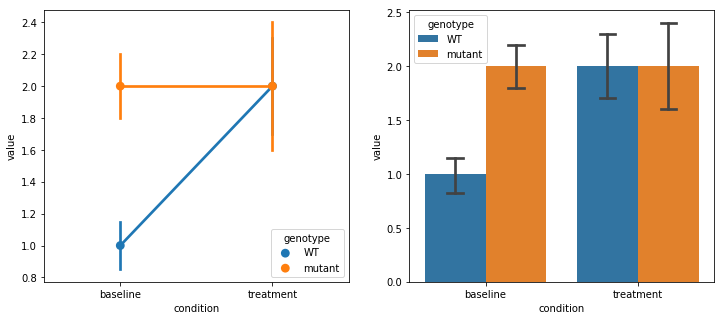

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.pointplot(x='condition', y='value', hue='genotype', ax=ax[0], data=df)
sns.barplot(x='condition', y='value', hue='genotype', capsize=0.1, ax=ax[1], data=df)